# Analysis of the Iris Data Set
***

Author: Irene Kilgannon

## Background to Fisher's Iris Data Set

In 1928 Edgar Anderson published his paper entitled ['The Problem of Species in the Northern Blue Flags, _Iris versicolor_ and _Iris virginica_'](https://www.biodiversitylibrary.org/page/15997721). Anderson was a evolutionary biologist interested in answering two questions namely, what are species and how have they originated? Between 1923 and 1928 he and his team studied _Iris versicolor_, at a number of different sites from Ontario in Canada to Alabama in the United States, by measuring a number of different iris characteristics. Surprisingly his study found that there were actually two different iris species present, _Iris versicolor_ and _Iris virginia_ and that it was possible to differentiate between them by geographic location. 

The data set is commonly known as Fisher's Iris Data set after the statistician and biologist, Ronald Fisher. The data measurements for _Isis setosa_ and _Iris versicolor_ were collected by Anderson from the same colony of plants in the Gaspé Peninsula, Quebec in 1935. According to [Unwin and Kleinman](https://www.jstor.org/stable/4331526?seq=13) the _Iris virginica_ data samples were from Anderson's original research and were collected in Camden, Tennessee. Fisher collated and analysed the data and in 1936 published his results in the Annals of Eugenics [The Use of Multiple Measurements in Taxonomic Problems](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x). He used a statistical method, linear discriminant analysis to attempt to distinguish the different iris species from each other. He found that _Iris setosa_ was easily distinguishable from the other two iris species using this method. 

Fisher's data set can be seen in his published paper but, in our computer age, the data set is available to download at [UCI Maching Learning Repository](https://archive.ics.uci.edu/dataset/53/iris). The data set is very widely used with currently over 700,000 views of the data set on the UCI website.

## Import the required modules

In [1]:
# Load the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data set

In [2]:
# Load the data set
iris = pd.read_csv("iris.data", header = None)

## Explore the Data Set

In [3]:
# Overview of the data set
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The quick overview of the data set reveals that there are no column names in the imported csv file.

The column names were obtained from the variables table on the [information page of the iris data set](https://archive.ics.uci.edu/dataset/53/iris). They are sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm and species.

Initally Problem loosing 1 row of data doing it this way. it is converting the data in row 0 to the column names direcly. need to add the column names above the row. Fixed the problem using the argument [header = None](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html) when reading in the csv file. 

In [4]:
# Add column names
iris.columns = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)', 'Species']
iris.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## The Variables in the Data Set

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.isna().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64

In [7]:
# Summary statistics of the data set
iris.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.groupby('Species').describe()

Sepal Length (cm)                                              \
                            count   mean       std  min    25%  50%  75%  max   
Species                                                                         
Iris-setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                Sepal Width (cm)         ... Petal Length (cm)       \
                           count   mean  ...               75%  max   
Species                                  ...                          
Iris-setosa                 50.0  3.418  ...             1.575  1.9   
Iris-versicolor             50.0  2.770  ...             4.600  5.1   
Iris-virginica              50.0  2.974  ...             5.875  6.9   

                Petal Width (cm)                                            
                           count   mean       std  min  25%  50%  75%  max  
Species                                                                     
Iris-setosa                 50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [10]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
setosa = iris[iris['Species'] == 'Iris-setosa']
setosa.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


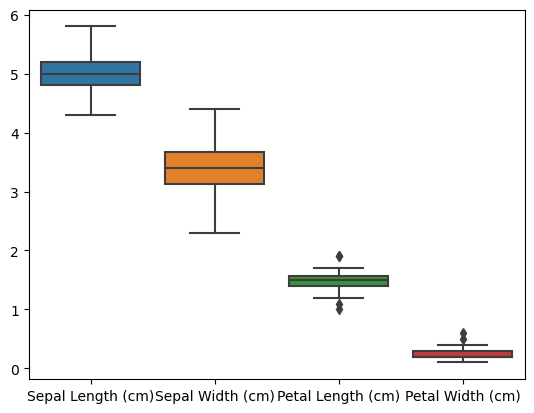

In [12]:
#Box plot of above, add titles

sns.boxplot(setosa)
plt.show()

In [14]:
versicolor = iris[iris['Species'] == 'Iris-versicolor']
versicolor.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


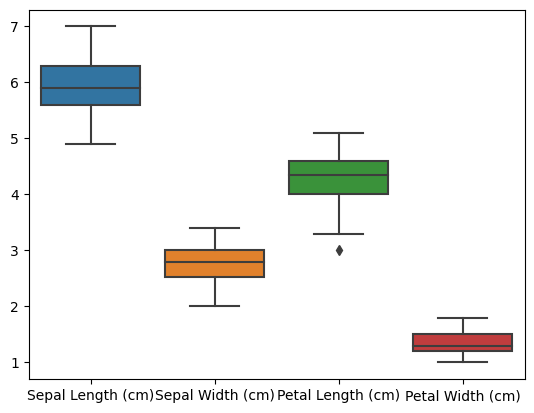

In [15]:
sns.boxplot(versicolor)
plt.show()

In [16]:
virginica = iris[iris['Species'] == 'Iris-virginica']
virginica.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


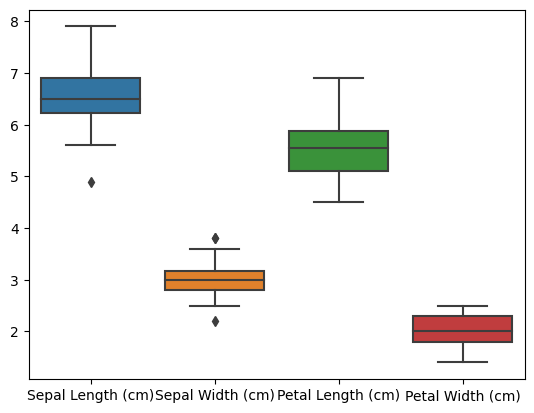

In [17]:
sns.boxplot(virginica)
plt.show()

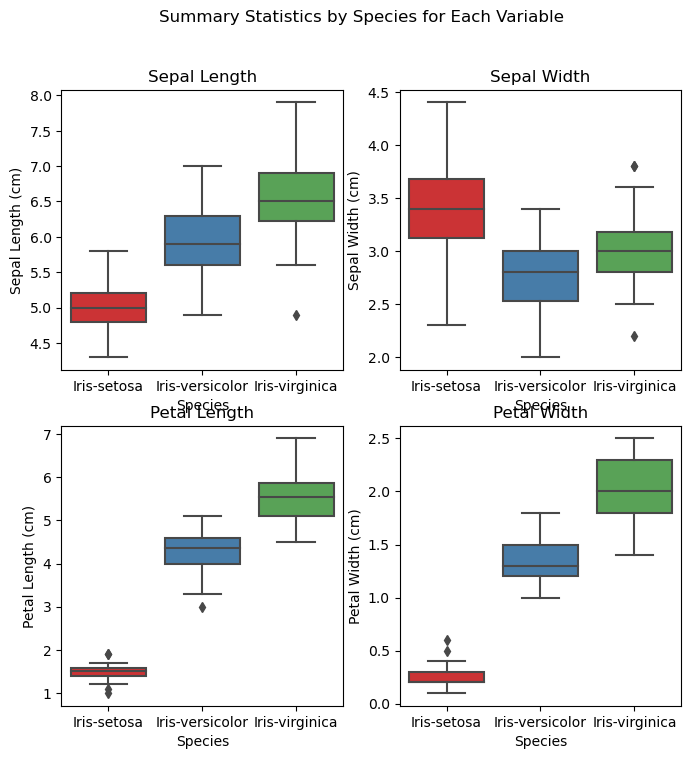

In [25]:
## Trying to compare across the three species. Looks squashed. 

fig, axes = plt.subplots(2,2, figsize = (8, 8))
sns.boxplot(ax = axes[0, 0], x = 'Species', y = 'Sepal Length (cm)', data = iris)
sns.boxplot(ax = axes[0, 1], x = iris['Species'], y= iris['Sepal Width (cm)'])
sns.boxplot(ax = axes[1, 0], x = iris['Species'], y = iris['Petal Length (cm)'])
sns.boxplot(ax = axes[1, 1], x = iris['Species'], y = iris['Petal Width (cm)'])
plt.suptitle('Summary Statistics by Species for Each Variable')
axes[0,0].set_title('Sepal Length')
axes[0,1].set_title('Sepal Width')
axes[1,0].set_title('Petal Length')
axes[1,1].set_title('Petal Width')
plt.savefig('Boxplot.png')
plt.show()

__Summary of the Data Set__

It is a small data set with 150 rows and five columns with each row corresponding to a different flower sample. There are three different iris species, _Iris setosa_, _Iris versicolor_ and _Iris virginica_ with 50 samples for each species. There is no data missing from any of the columns.


![iris](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*YYiQed4kj_EZ2qfg_imDWA.png)

Four measurements (or variables) were taken for each flower examined:
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

Each iris has three true petals and three sepals. The three petals are upright and are also know as standards. Sepals are a modified leaf and are sometimes called falls. Sepals are usually green in colour and its function is to protect the developing flower bud. When the flower has bloomed the iris' sepal is described as "the landing pad for bumblebees" by the [US Forest Service](https://www.fs.usda.gov/wildflowers/beauty/iris/flower.shtml). This diagram from nicely illustrates the petals and the sepals.

## Histogram of each variable

A histogram of each variable must be saved to a png file.

TO DO
overall hist
breakdown by species. 

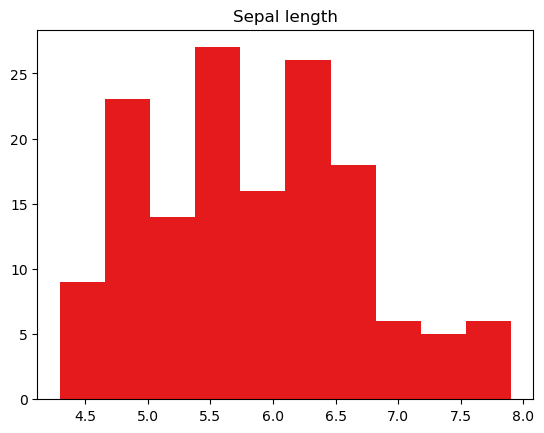

In [26]:
plt.hist(iris['Sepal Length (cm)'])
plt.title('Sepal length')
plt.show()

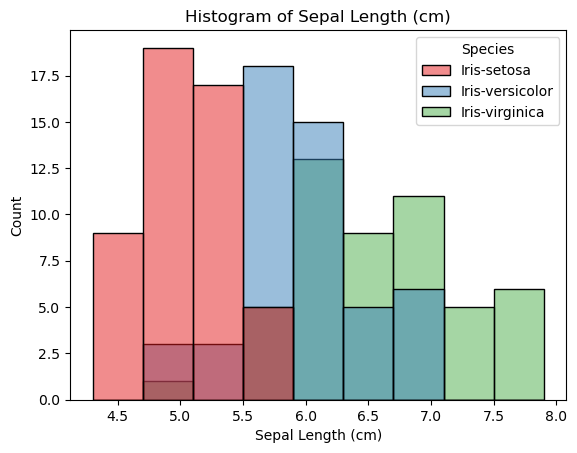

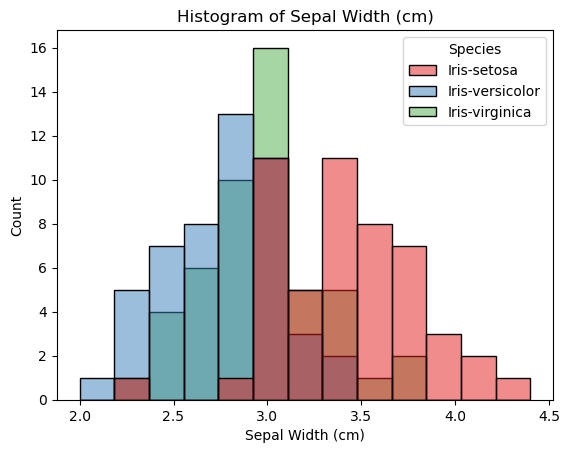

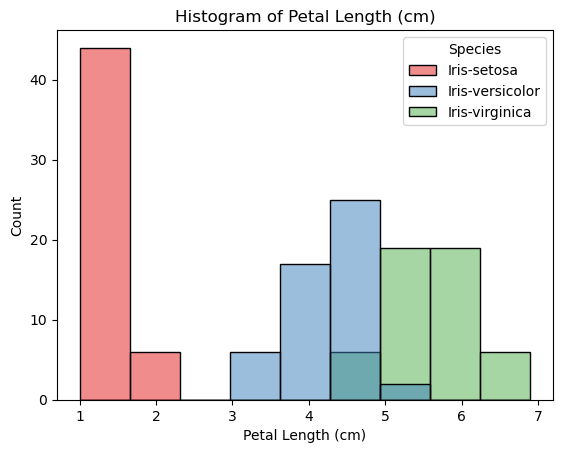

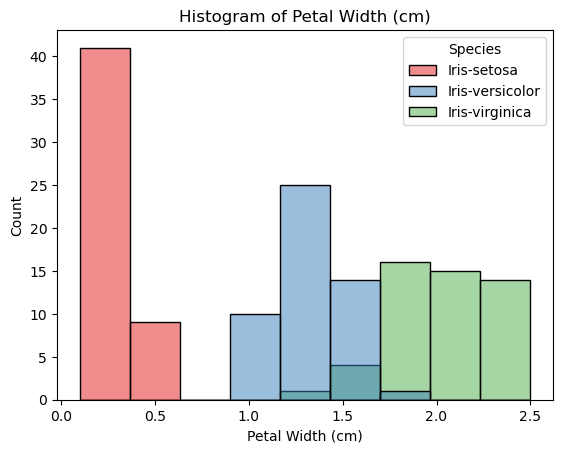

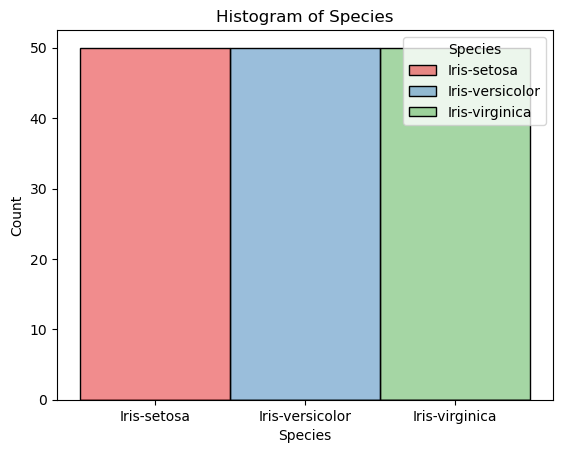

In [27]:
for col in iris:
    sns.set_palette("Set1")
    sns.histplot(x = col, data = iris, hue = 'Species')
    plt.title(f'Histogram of {col}')
    plt.savefig(f'{col}.png')
    plt.show()

## Scatter plot of each pair of variables. 

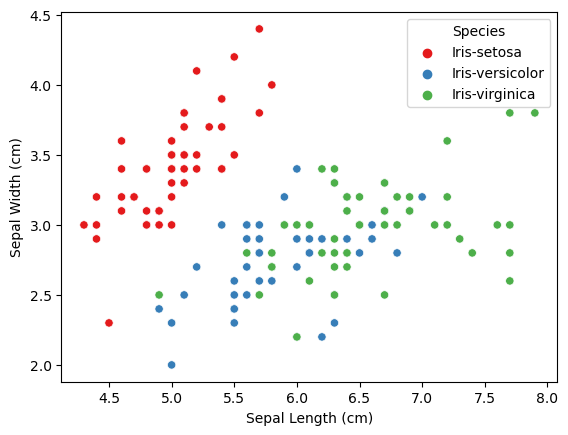

In [28]:
sns.scatterplot(data = iris, x = 'Sepal Length (cm)', y = 'Sepal Width (cm)', hue = 'Species')
plt.show()

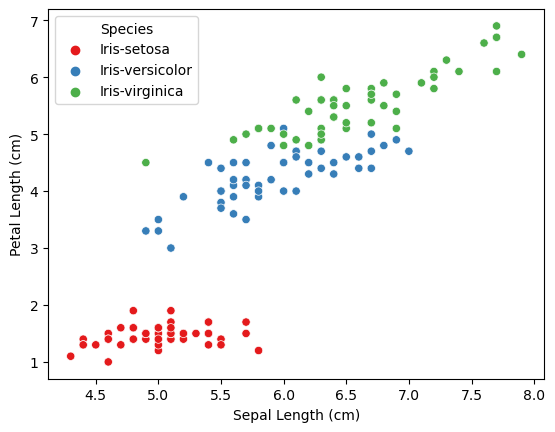

In [29]:
sns.scatterplot(data = iris, x = 'Sepal Length (cm)', y = 'Petal Length (cm)', hue = 'Species')
plt.show()

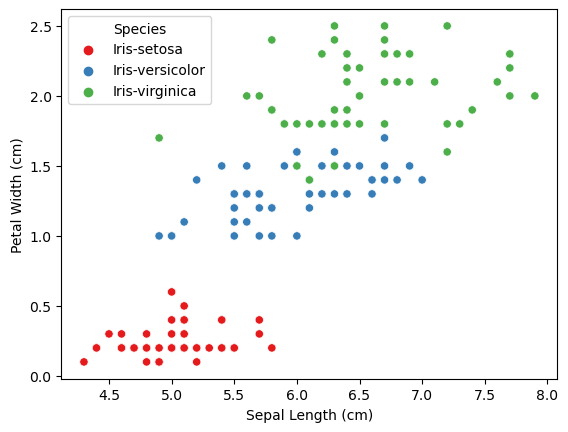

In [30]:
sns.scatterplot(data = iris, x = 'Sepal Length (cm)', y = 'Petal Width (cm)', hue = 'Species')
plt.show()

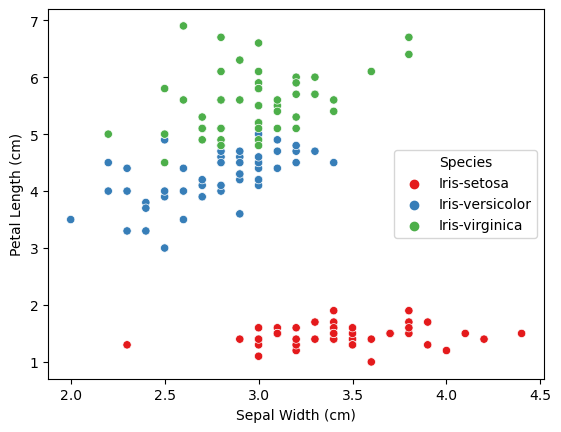

In [31]:
sns.scatterplot(data = iris, x = 'Sepal Width (cm)', y = 'Petal Length (cm)', hue = 'Species')
plt.show()

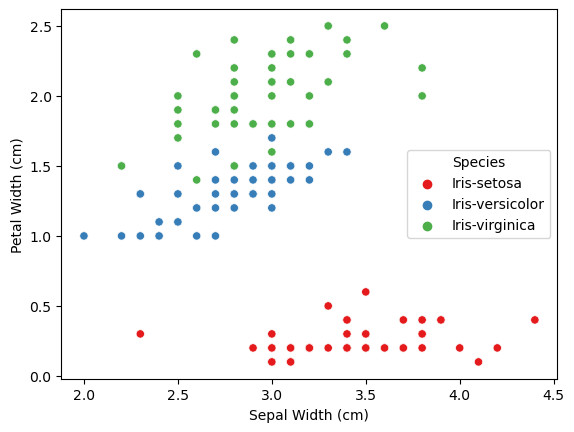

In [32]:
sns.scatterplot(data = iris, x = 'Sepal Width (cm)', y = 'Petal Width (cm)', hue = 'Species')
plt.show()

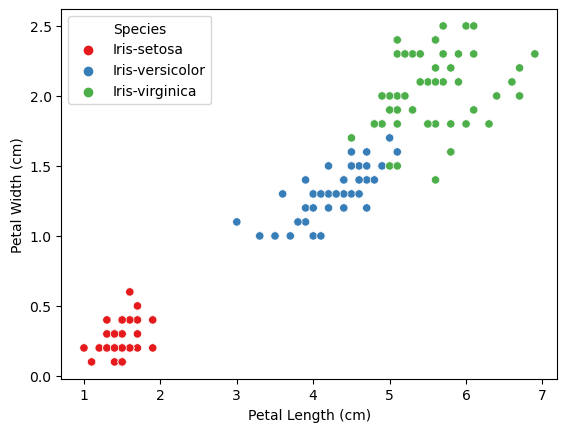

In [33]:
sns.scatterplot(data = iris, x = 'Petal Length (cm)', y = 'Petal Width (cm)', hue = 'Species')
plt.show()

Pairplots

https://www.geeksforgeeks.org/python-seaborn-pairplot-method/

c:\Users\Martin\anacondaik\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


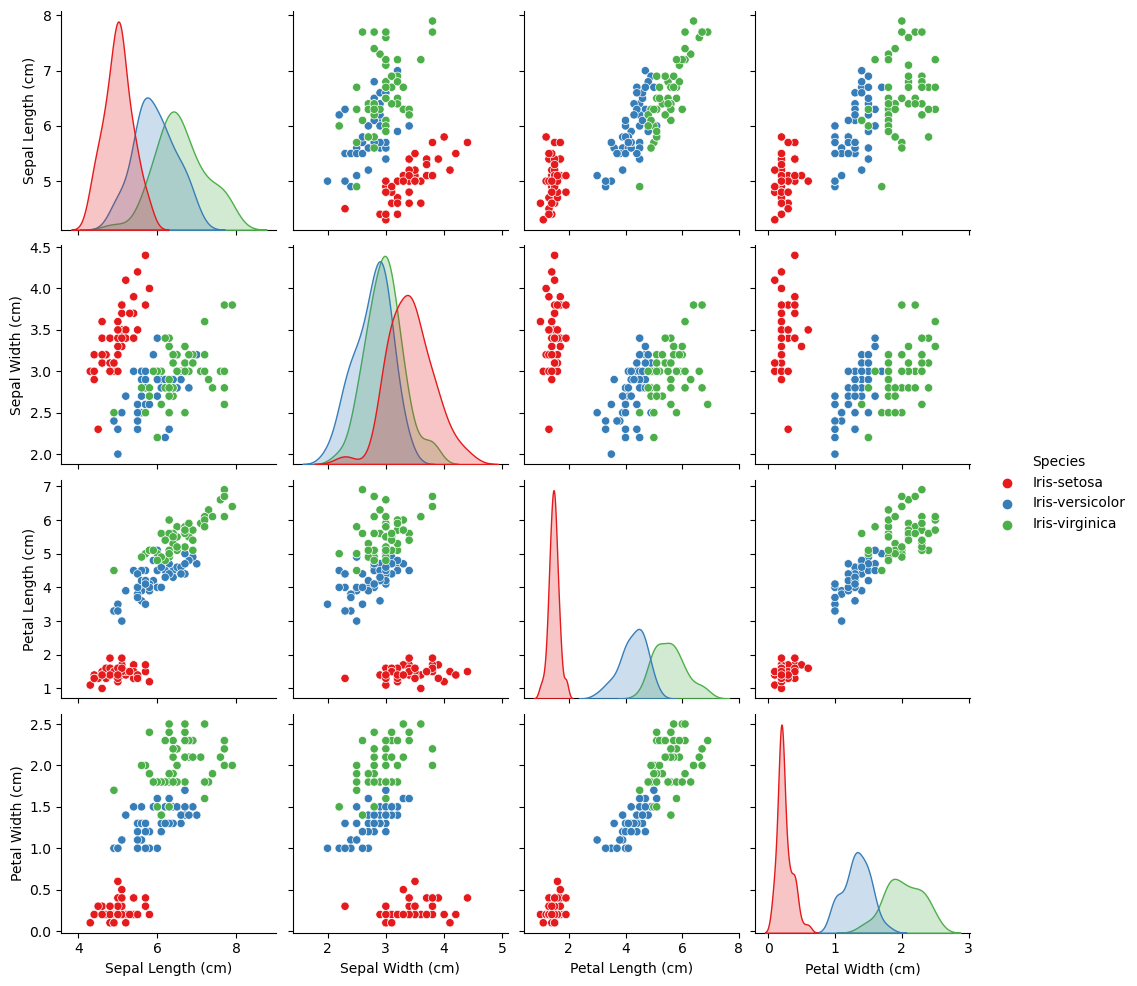

In [34]:
sns.pairplot(iris, hue = 'Species')
plt.show()

## Correlation diagrams

Any other analysis , heatmaps

In [35]:
iris.drop(['Species'], axis = 1).corr()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
Sepal Length (cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal Length (cm),0.871754,-0.420516,1.000000,0.962757
Petal Width (cm),0.817954,-0.356544,0.962757,1.000000


heatmap by flower species

<Axes: >

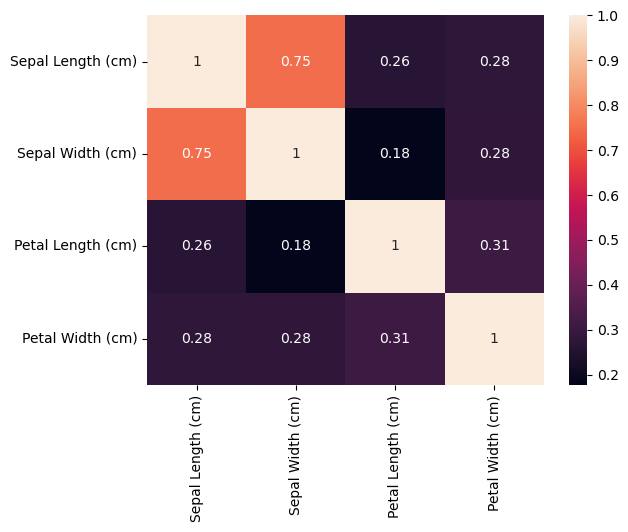

In [36]:
sns.heatmap(setosa.drop(['Species'], axis = 1).corr(), annot = True)

<Axes: >

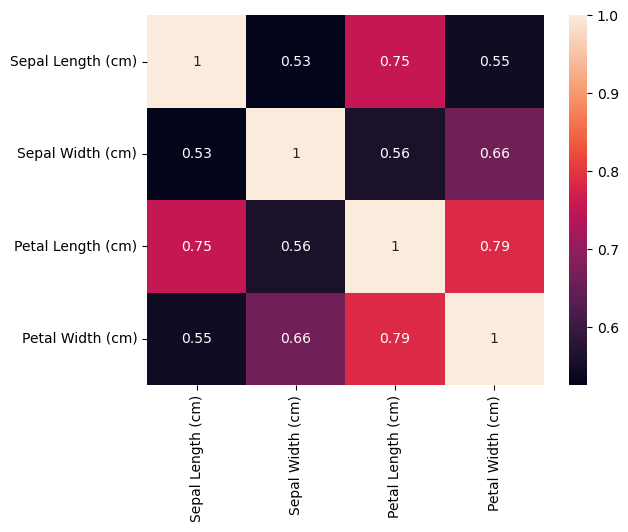

In [37]:
sns.heatmap(versicolor.drop(['Species'], axis = 1).corr(), annot = True)

<Axes: >

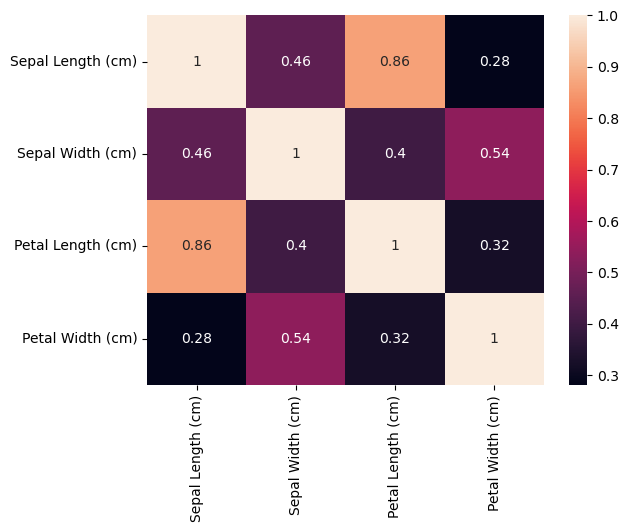

In [38]:
sns.heatmap(virginica.drop(['Species'], axis = 1).corr(), annot = True)

Linear regression references and research

the basics https://archive.is/VDeY2

https://archive.is/QioLp

https://archive.is/M1JG5

## References

https://www.geeksforgeeks.org/ways-to-save-python-terminal-output-to-a-text-file/

[Iris Data Set](https://archive.ics.uci.edu/dataset/53/iris)


*** 
## END